# Explore here

In [2]:
# Para poder leer los archivos .env
import os
from dotenv import load_dotenv

# Librería para utilizar la API de Spotify: 
import spotipy 

# Librería para autenticar aplicaciones de Spotipy usando credenciales de cliente:
from spotipy.oauth2 import SpotifyClientCredentials

# Librería para poder utilizar DataFrames:
import pandas as pd

# Librería para poder mostrar gráficos:
import matplotlib.pyplot as plt


### Paso 1 - Creación de Cuenta Desrrollador en Spotify:

Se ha creado una **cuenta de desarrollador en Spotify** a partir del link aportado y se han obtenido los **números de cliente y secreto** que se utilizarán en el Paso 3.

### Paso 2 - Configuración Inicial:

Todo el proyecto se ha desarrollado en el presente archivo `.ipynb` en lugar de en el archivo `app.py` para poder utilizar la funcionalidad del notebook

In [58]:
# Comando para instalar la librería Spotipy en el entorno de desarrollo:
! pip install spotipy

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


### Paso 3 - Variables de Entorno: 

Se ha creado un archivo `.env`con el número de cliente `(CLIENT_ID)` y el número secreto `(CLIENT_SECRET)`.

Debido a la **confidencialidad** de esta información, se ha explicitado el nombre del archivo donde se guardan dichos datos en `.gitignore` para evitar que se comparta.


In [3]:
# Se explicita la ruta donde se encuentra el archivo desde donde se han de extraer las credenciales:
load_dotenv('/workspaces/interacting-with-api-python-project-tutorial-clara/src/credentials.env');

# Se guardan las credenciales
client_id = os.environ.get("CLIENT_ID");
client_secret = os.environ.get("CLIENT_SECRET");


### Paso 4 - Inicialización de la Biblioteca Spotipy:

In [4]:
# Se gestiona la autenticación en Spotipy con las credenciales dadas por la cuenta:
client_credential_manager = SpotifyClientCredentials(client_id = client_id, client_secret = client_secret);

# Se crea una instancia de Spotify a partir de las credeciales para establecer la conexión:
conexion = spotipy.Spotify (client_credentials_manager = client_credential_manager)

### Paso 5 - Obtención Top 10 Canciones:

En este caso se ha tomado la ID de la artista Miley Cryus.

Se ha programado esta funcionalidad de forma que, a la vez se cree el DataFrame solicitado en el siguiente paso para no tener que repetir el procedimiento.

In [7]:
# Se guarda el ID del artista para poder generar la URL a través de él:
id_artist = "5YGY8feqx7naU7z4HrwZM6";
url = f"spotify:artist:{id_artist}";

# Se obtienen las canciones más populares del artista especificado:
top_tracks = conexion.artist_top_tracks(url);

# Se genera una lista vacía para poder almacenar la información extraída gracias a la API:
data = [];

# Se itera a través de las 10 primeras canciones más populares del artista, guardando la información relevante:
for track in top_tracks['tracks'][:10]:

    # Se va guardando la información relevante en una lista de listas:
    data.append ((track['name'], round((track['duration_ms'])/60000, 2), track['popularity']));

    # Se imprime la información deseada:
    print (f" Track: {track['name']}");
    print (f" Duración: {round((track['duration_ms'])/60000, 2)}");
    print (f" Popularidad: {track['popularity']}/100");
    print ("-"*50);
    
    

 Track: Flowers
 Duración: 3.34
 Popularidad: 86/100
--------------------------------------------------
 Track: Party In The U.S.A.
 Duración: 3.37
 Popularidad: 78/100
--------------------------------------------------
 Track: Angels Like You
 Duración: 3.27
 Popularidad: 78/100
--------------------------------------------------
 Track: Wrecking Ball
 Duración: 3.69
 Popularidad: 78/100
--------------------------------------------------
 Track: Nothing Breaks Like a Heart (feat. Miley Cyrus)
 Duración: 3.62
 Popularidad: 75/100
--------------------------------------------------
 Track: We Can't Stop
 Duración: 3.85
 Popularidad: 77/100
--------------------------------------------------
 Track: The Climb
 Duración: 3.91
 Popularidad: 70/100
--------------------------------------------------
 Track: Prisoner (feat. Dua Lipa)
 Duración: 2.82
 Popularidad: 70/100
--------------------------------------------------
 Track: Used To Be Young
 Duración: 3.19
 Popularidad: 69/100
--------------

Una vez se tiene toda la información almacenada en la lista de listas, se pasa a un DataFrame

In [8]:
# Se pasa la lista de listas a DataFrame:
df = pd.DataFrame (data, columns=['Canción', 'Duracion', 'Popularidad']);

df

,Canción,Duracion,Popularidad
0,Flowers,3.34,86
1,Party In The U.S.A.,3.37,78
2,Angels Like You,3.27,78
3,Wrecking Ball,3.69,78
4,Nothing Breaks Like a Heart (feat. Miley Cyrus),3.62,75
5,We Can't Stop,3.85,77
6,The Climb,3.91,70
7,Prisoner (feat. Dua Lipa),2.82,70
8,Used To Be Young,3.19,69
9,Rockin' Around The Christmas Tree,1.94,68


In [10]:
# Se ordena el DataFrame por Popularidad:
lower_to_higher = df.sort_values (by = "Popularidad", ascending=True);
higher_to_lower = df.sort_values (by = "Popularidad", ascending=False);

# Se muestra el TOP 3:
higher_to_lower.head(3)

,Canción,Duracion,Popularidad
0,Flowers,3.34,86
1,Party In The U.S.A.,3.37,78
2,Angels Like You,3.27,78


### Paso 6 - Análisis de la Relación Estadística entre la Duración y la Popularidad de las Canciones:

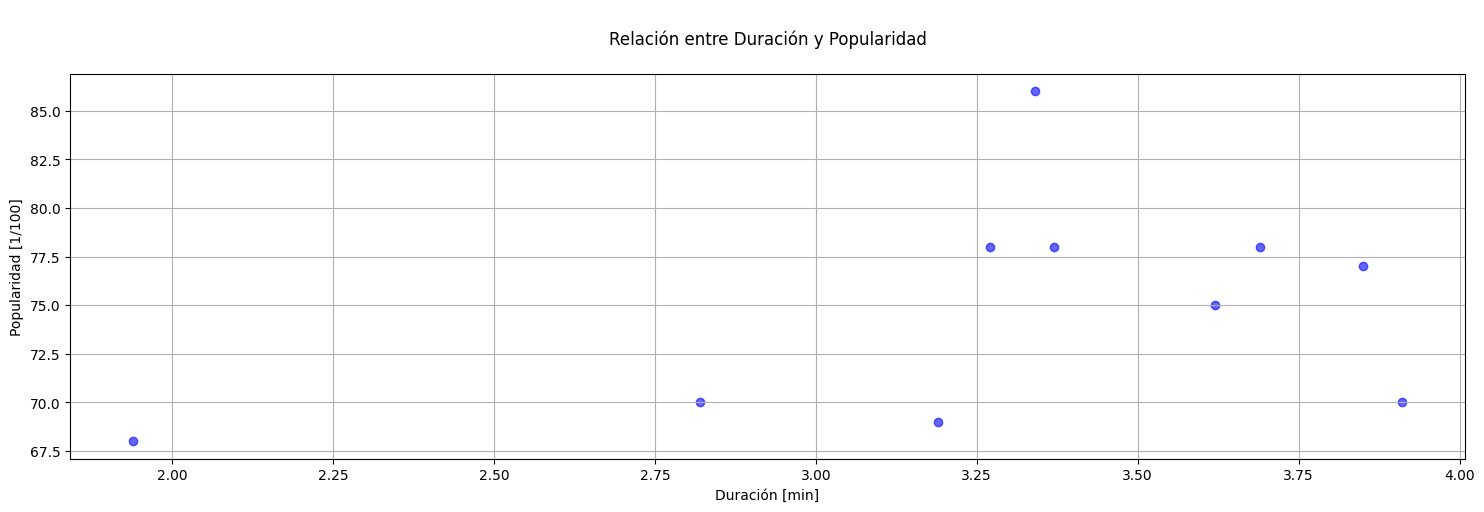

In [15]:
# Se crea la figura:
plt.figure(figsize= (18, 5));

# Se realiza y muestra el gráfico:
plt.scatter(higher_to_lower['Duracion'], higher_to_lower['Popularidad'], color='blue', alpha=0.6);
plt.title("\nRelación entre Duración y Popularidad\n");
plt.grid(True);
plt.xlabel("Duración [min]");
plt.ylabel("Popularidad [1/100]");

En el caso de la artista seleccionada, no se aprecia una relación clara entre la duración de las canciones y su popularidad, dado que no hay un patrón que indique una correlación ni ascendente ni descendente. 

Se puede ver, por ejemplo, que dos canciones muy lejanas en duración (2.8 mins y 3.9 mins aproximadamente) tiene un nivel de popularidad prácticamente igual, del 70/100.

Por todo ello, no parece que las canciones más cortas sean más populares en el caso de la artista estudiada.